In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

########## Sklearn #############
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression     # Lojistik Regresyon
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # KNN - En Yakın Komşu
from sklearn.svm import SVC                             # SVC - Karar Destek Sınıflandırıcı
from sklearn import tree                                # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.tree import DecisionTreeClassifier         # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.ensemble import BaggingClassifier          # Bagging
from sklearn.ensemble import VotingClassifier           # Voting 
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import AdaBoostClassifier         # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # GBM - Gradient Boosting Machine
from xgboost import XGBClassifier                       # XGBoost | !pip install xgboost
from lightgbm import LGBMClassifier                     # LightGBM | !conda install -c conda-forge lightgbm
from catboost import CatBoostClassifier                 # CatBoost | !pip install catboost

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [367]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_index = test.PassengerId.copy()
df_train = train.copy()
df_test = test.copy()

In [368]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [369]:
df_train.drop(["PassengerId"], axis = 1, inplace = True)

In [370]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [371]:
df_test.drop(["PassengerId"], axis = 1, inplace = True)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [372]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# Exploratory Data Analysis and Visualization

In [373]:
print(df_train.shape)
print(df_test.shape)

(891, 11)
(418, 10)


In [374]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

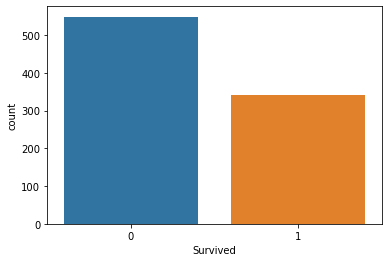

In [375]:
sns.countplot(x="Survived", data=df_train)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

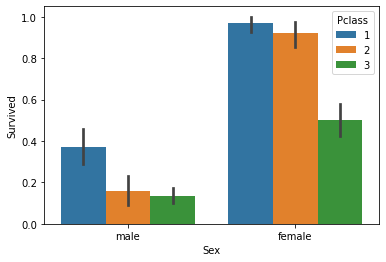

In [376]:
print(df_train.groupby(["Sex", "Pclass"])["Survived"].mean())
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

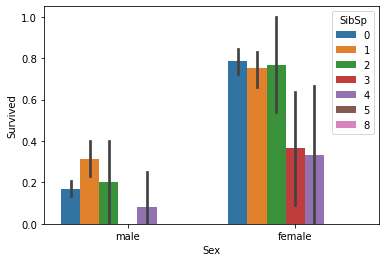

In [377]:
sns.barplot(y="Survived", x="Sex", hue="SibSp", data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

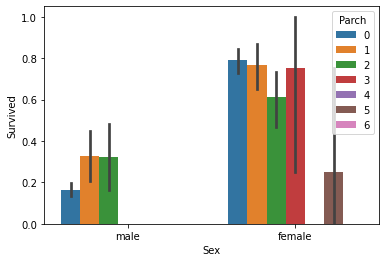

In [378]:
sns.barplot(y="Survived", x="Sex", hue="Parch", data=df_train)

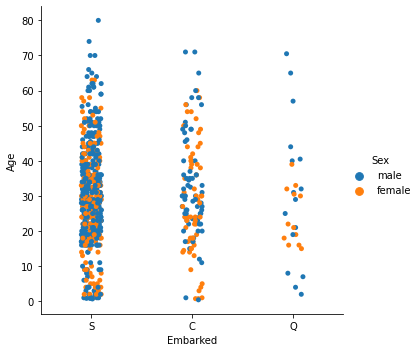

In [379]:
sns.catplot(x="Embarked", y="Age",  hue = "Sex", data = df_train)

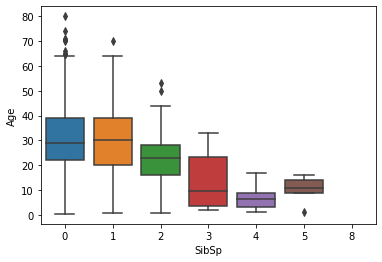

In [380]:
sns.boxplot("SibSp", "Age", data = df_train);

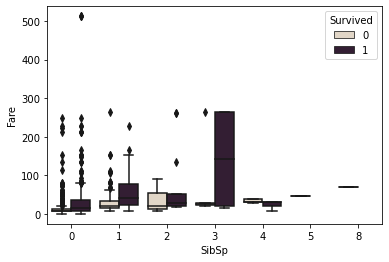

In [381]:
sns.boxplot("SibSp", "Fare", hue = "Survived", data = df_train, palette="ch:0.25");

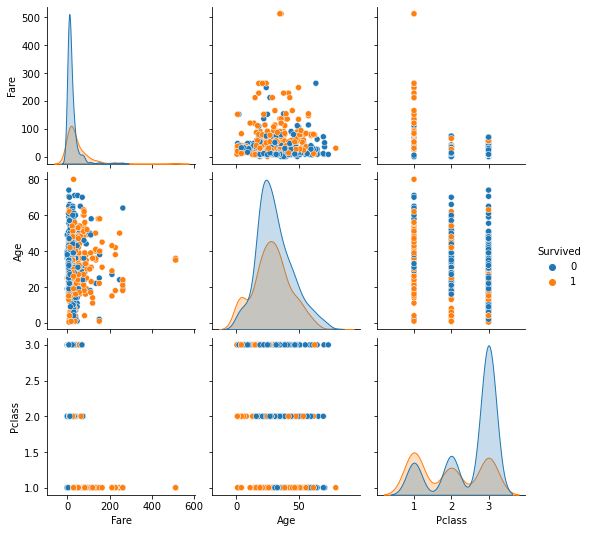

In [382]:
sns.pairplot(data=df_train[["Fare", "Survived", "Age", "Pclass"]], hue = "Survived", dropna = True);

In [383]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins = True).style.background_gradient(cmap = 'cubehelix_r')

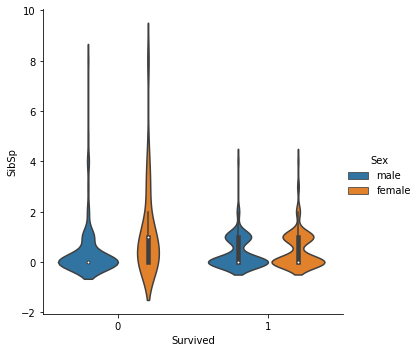

In [384]:
sns.catplot("Survived", "SibSp", kind = "violin", hue = "Sex", data = df_train);

In [385]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [386]:
df_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

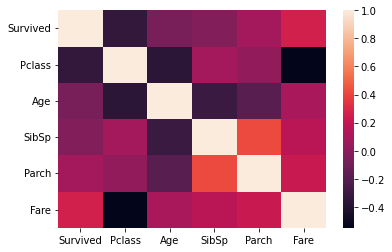

In [387]:
sns.heatmap(df_train.corr())

# Missing Data Visualization

<AxesSubplot:>

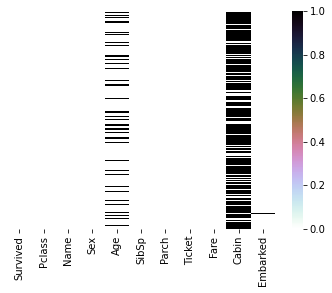

In [388]:
sns.heatmap(df_train.isnull(), cmap = "cubehelix_r", yticklabels='')

# Filling The Missing Data

In [389]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [390]:
df_train["Embarked"] = train["Embarked"].fillna('S')
df_test["Embarked"] = test["Embarked"].fillna('S')

In [391]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)

In [392]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# Preprocessing the datasets

In [393]:
df_train.drop(['Name'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35,1,0,113803,53.1000,C123,S
4,0,3,male,35,0,0,373450,8.0500,NaN,S


In [394]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [395]:
df_test.drop(["Name"], axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22,0,0,330911,7.8292,NaN,Q
1,3,female,38,1,0,363272,7.0000,NaN,S
2,2,male,26,0,0,240276,9.6875,NaN,Q
3,3,male,35,0,0,315154,8.6625,NaN,S
4,3,female,35,1,1,3101298,12.2875,NaN,S


In [396]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [397]:
df_test["Fare"] = np.where(df_test.Fare.isnull(), df_test.Fare.mean(), df_test.Fare)

# Convert categorical variable into dummy variables

In [398]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [399]:
Sex = pd.get_dummies(df_train["Sex"])

Embarked = pd.get_dummies(df_train["Embarked"])

Pclass = pd.get_dummies(df_train["Pclass"])

df_train.drop(["Sex","Embarked","Pclass"], axis=1, inplace=True)

In [400]:
df_train = pd.concat([df_train, Sex, Embarked, Pclass], axis=1)
df_train.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,1,2,3
0,0,22,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,1,38,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,1,26,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,1,35,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,0,35,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [401]:
df_train.shape

(891, 15)

In [402]:
df_test.dtypes

Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [403]:
Sex = pd.get_dummies(df_test["Sex"])

Embarked = pd.get_dummies(df_test["Embarked"])

Pclass = pd.get_dummies(df_test["Pclass"])

df_test.drop(["Sex","Embarked","Pclass"], axis=1, inplace=True)

In [404]:
df_test = pd.concat([df_test, Sex, Embarked, Pclass], axis=1)
df_test.head()

,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,1,2,3
0,22,0,0,330911,7.8292,NaN,0,1,0,1,0,0,0,1
1,38,1,0,363272,7.0000,NaN,1,0,0,0,1,0,0,1
2,26,0,0,240276,9.6875,NaN,0,1,0,1,0,0,1,0
3,35,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0,1
4,35,1,1,3101298,12.2875,NaN,1,0,0,0,1,0,0,1


In [405]:
df_test.shape

(418, 14)

# Let's set the input and output data

In [406]:
X=df_train.drop("Survived",axis=1)
y=df_train["Survived"]

In [407]:
print(X.shape)
print(y.shape)

(891, 14)
(891,)


# Label Encoder

In [408]:
cat = df_train.select_dtypes(include=["object"]).columns
for col in df_train[cat].columns:
        
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
        
    le = LabelEncoder()
    le.fit(list(df_train[col])+list(df_test[col]))
    df_train[col] = le.transform(df_train[col])
    df_test[col]  = le.transform(df_test[col])

# Train/Test Split

In [409]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop("Survived", axis = 1),
                                                    df_train.Survived, 
                                                    test_size = 0.20,
                                                    random_state = 45)

In [410]:
gs_test = pd.read_csv("gender_submission.csv")

In [411]:
gs_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [412]:
gs_test.drop(["PassengerId"], axis=1, inplace=True)

In [413]:
gs_test=gs_test["Survived"]

In [414]:
gs_test.shape

(418,)

# Building the model

In [415]:
# Logistic Regression
lg_model = LogisticRegression(solver = "liblinear")
lg_model.fit(X_train, y_train)
y_pred_log = lg_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# SVM - Linear
svc_model = SVC(kernel = "linear", probability=True) 
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# SVM - RBF
svc_rbf_model = SVC(kernel = "rbf",probability=True) 
svc_rbf_model.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf_model.predict(X_test)

# CART
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

# BAGGING
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

# VOTING
clf1 = LogisticRegression(solver = "liblinear")
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
vote_model = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
vote_model.fit(X_train, y_train)
y_pred_vote = vote_model.predict(X_test)

# RANDOM FOREST
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ADABOOST
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# GBM
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# XGBOOST
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LGBM
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# CATBOOST
cat_model = CatBoostClassifier()
cat_model.fit(df_train.drop("Survived",axis = 1), df_train.Survived, verbose = 0)
y_pred_cat = cat_model.predict(X_test)

In [416]:
modeller = [
    lg_model,
    nb_model,
    knn_model,
    svc_model,
    cart_model,
    bag_model,
    vote_model,
    rf_model,
    ada_model,
    gbm_model,
    xgb_model,
    lgb_model,
    cat_model
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*45)
    print(isimler + ":")
    print("Train_Accuracy: {:.4%}".format(accuracy))
    pred = model.predict(df_test)
    test_accuracy = accuracy_score(gs_test,pred)
    print("Test_Accuracy: {:.4%}".format(test_accuracy))

---------------------------------------------
LogisticRegression:
Train_Accuracy: 82.6816%
Test_Accuracy: 87.7990%
---------------------------------------------
GaussianNB:
Train_Accuracy: 81.0056%
Test_Accuracy: 88.7560%
---------------------------------------------
KNeighborsClassifier:
Train_Accuracy: 73.7430%
Test_Accuracy: 59.5694%
---------------------------------------------
SVC:
Train_Accuracy: 84.3575%
Test_Accuracy: 98.0861%
---------------------------------------------
DecisionTreeClassifier:
Train_Accuracy: 82.1229%
Test_Accuracy: 76.0766%
---------------------------------------------
BaggingClassifier:
Train_Accuracy: 87.1508%
Test_Accuracy: 80.8612%
---------------------------------------------
VotingClassifier:
Train_Accuracy: 83.7989%
Test_Accuracy: 89.4737%
---------------------------------------------
RandomForestClassifier:
Train_Accuracy: 86.5922%
Test_Accuracy: 85.8852%
---------------------------------------------
AdaBoostClassifier:
Train_Accuracy: 82.6816%
Test_

Text(0.5, 1.0, 'Accuracy Rates of Models')

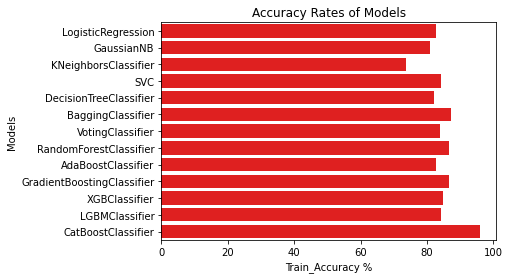

In [417]:
result = []

results = pd.DataFrame(columns= ["Models", "Train_Accuracy", "Test_Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    pred = model.predict(df_test)
    test_accuracy = accuracy_score(gs_test,pred)
    result = pd.DataFrame([[isimler,accuracy*100,test_accuracy*100]], columns=["Models", "Train_Accuracy", "Test_Accuracy"])
    results = results.append(result)


sns.barplot(x= "Train_Accuracy", y= "Models", data=results, color="r")
plt.xlabel("Train_Accuracy %")
plt.title("Accuracy Rates of Models")

In [418]:
results

,Models,Train_Accuracy,Test_Accuracy
0,LogisticRegression,82.681564,87.799043
0,GaussianNB,81.005587,88.755981
0,KNeighborsClassifier,73.743017,59.569378
0,SVC,84.357542,98.086124
0,DecisionTreeClassifier,82.122905,76.076555
0,BaggingClassifier,87.150838,80.861244
0,VotingClassifier,83.798883,89.473684
0,RandomForestClassifier,86.592179,85.885167
0,AdaBoostClassifier,82.681564,84.449761
0,GradientBoostingClassifier,86.592179,84.928230


# Predicting the test dataset

In [419]:
pred = lg_model.predict(df_test)

In [420]:
predictions = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})

In [421]:
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [422]:
log = LogisticRegression(solver = "liblinear")
log.fit(X_train, y_train)
y_predprob = log.predict_proba(X_test)[:,1]

for k in np.arange(0,1.1, 0.1).round(1):
    y_pred = [1 if i > k else 0 for i in y_predprob]
    print("Threshold: "+str(k)+ " ", "|", "Accuracy: "+ str(accuracy_score(y_test, y_pred)))

Threshold: 0.0  | Accuracy: 0.3463687150837989
Threshold: 0.1  | Accuracy: 0.4860335195530726
Threshold: 0.2  | Accuracy: 0.7262569832402235
Threshold: 0.3  | Accuracy: 0.8044692737430168
Threshold: 0.4  | Accuracy: 0.8212290502793296
Threshold: 0.5  | Accuracy: 0.8268156424581006
Threshold: 0.6  | Accuracy: 0.8603351955307262
Threshold: 0.7  | Accuracy: 0.8491620111731844
Threshold: 0.8  | Accuracy: 0.8044692737430168
Threshold: 0.9  | Accuracy: 0.7150837988826816
Threshold: 1.0  | Accuracy: 0.6536312849162011


# Kaggle

In [423]:
df_train.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,1,2,3
0,0,22,1,0,720,7.2500,186,0,1,0,0,1,0,0,1
1,1,38,1,0,816,71.2833,106,1,0,1,0,0,1,0,0
2,1,26,0,0,914,7.9250,186,1,0,0,0,1,0,0,1
3,1,35,1,0,65,53.1000,70,1,0,0,0,1,1,0,0
4,0,35,0,0,649,8.0500,186,0,1,0,0,1,0,0,1


In [424]:
df_test.head()

,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,1,2,3
0,22,0,0,376,7.8292,186,0,1,0,1,0,0,0,1
1,38,1,0,582,7.0000,186,1,0,0,0,1,0,0,1
2,26,0,0,184,9.6875,186,0,1,0,1,0,0,1,0
3,35,0,0,366,8.6625,186,0,1,0,0,1,0,0,1
4,35,1,1,338,12.2875,186,1,0,0,0,1,0,0,1


In [426]:
log = LogisticRegression(solver = "liblinear")
log.fit(df_train.drop("Survived", axis = 1), df_train.Survived)
ypred = log.predict_proba(df_test)[:,1]

In [428]:
ypred.shape

(418,)

In [429]:
# The best threshold was 0.6
ypred = [1 if i > 0.6 else 0 for i in ypred]

In [439]:
ts = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': ypred})
ts

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [440]:
# The best threshold was 0.6
ypred = [1 if i > 0.6 else 0 for i in ypred]
ts["Survived"] = ypred
submissionlog = ts[["PassengerId", "Survived"]]
submissionlog.to_csv("submissionlog.csv",columns = ["PassengerId", "Survived"] , index = None)

In [441]:
submissionlog.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
